In [406]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [407]:
df=pd.read_csv('/home/violett/Downloads/descriptive_stats/clients.csv')


In [408]:
#Переименовали часть столбцов для удобного обращения к ним
df.rename(columns = { 'Year of sale': 'year_of_sale' }, inplace = True )
df.rename(columns = {'Month of sale': 'month_of_sale'}, inplace = True)
df.rename(columns = {'Type of property': 'type_of_property'}, inplace = True)
df.rename(columns = {'Area (ft.)': 'area'}, inplace = True)
df.rename(columns = {'Customer ID': 'customer_id'}, inplace = True)
df.rename(columns = {'Age Interval ': 'age_interval'}, inplace = True)
df.rename(columns = {'Customer ID' : 'customer_id'}, inplace = True)
df.rename(columns = {'Deal satisfaction' : 'deal_satisfaction'}, inplace=True)
# Перевод цены из dtype: object to dtype: float
df['Price'] = df['Price'].replace({'\$':''}, regex = True)
df['Price'] = df['Price'].replace({'\,':''}, regex = True)
df['Price'] = df['Price'].map(lambda x: float(x))

In [409]:
print("Средний возраст покупателя: ", round(2022 - np.mean(df['Y'])))
df['age']=round(2022-df['Y'])
#Создадим копию датафрейма 
df_copy = df.copy(deep=True)
df_copy= df.dropna(how='any')#Удалим данные с отсутсвующими значениями

Средний возраст покупателя:  62


In [442]:
#Какая возрастная группа чаще покупала недвижимость?
df1=df_copy.groupby(['age_interval'])['age'].agg(['count'])
df1.sort_values( by = 'count', ascending = False).style.bar(color='#4499cc')

,count
age_interval,
36-45,48
46-55,40
26-35,36
56-65,18
65+,17
18-25,5


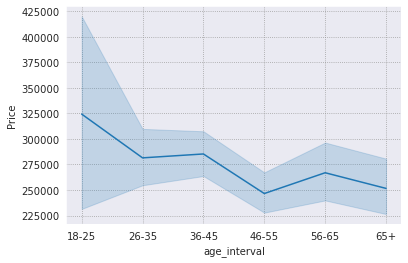

In [411]:
# Люди какого возраста больше тратят на недвижимость?
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data = df_copy, x = "age_interval", y = "Price");

In [421]:
#Средний чек покупателя
print("Медианный чек покупателя:", round(np.median(df['Price'])), '$')


Медианный чек покупателя: 243053 $


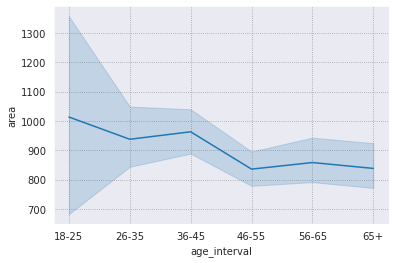

In [412]:
# Люди какого возраста покупают бОльшую по площади недвижимость?
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data = df_copy, x = "age_interval", y = "area");

In [420]:
#Средняя площадь квартиры
print("Медианная площадь квартиры:", round(np.median(df['area'])), '(ft)')

Средняя площадь квартиры: 785 (ft)


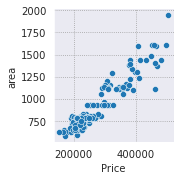

In [419]:
#Как зависят площадь и цена на недвижимость?
sns.pairplot(
    df_copy,
    x_vars=["Price"],
    y_vars=["area"],
);
#Можно дальше рассматривать один из показателей: или цену или площадь, так как показатели имею прямую зависимость
#друг от друга

In [443]:
#Какой тип недвижимости более востребован?
df1=df_copy.groupby(['Purpose'])['age_interval'].agg(['count'])
df1.sort_values( by = 'count', ascending = False).style.bar(color='#4499cc')

,count
Purpose,
Home,114
Investment,50


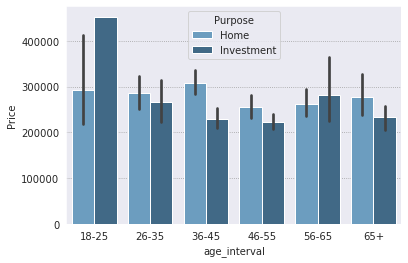

In [392]:
#На какой тип недвижимости люди разных возрастов люди тратят деньги чаще?
sns.barplot(x="age_interval", y="Price", hue="Purpose", data=df_copy, palette="Blues_d");

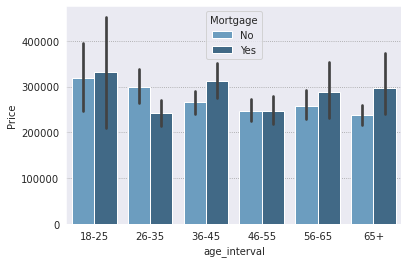

In [393]:
#Как влияет наличие ипотеки на покупку недвижимости в разных возрастных группах?
sns.barplot(x="age_interval", y="Price", hue="Mortgage", data=df_copy, palette="Blues_d");

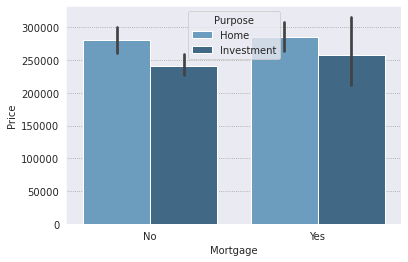

In [405]:
#Какой тип недвижимости больше покупают в ипотеку
sns.barplot(x="Mortgage", y="Price", hue="Purpose", data=df_copy, palette="Blues_d");

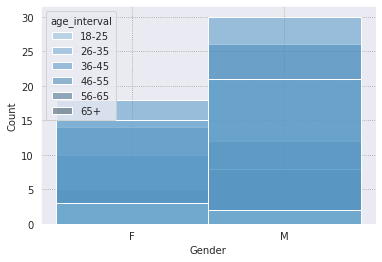

In [455]:
# Количество женщин и мужчин купивших недвижимость с распределением по возрасту
sns.histplot(data=df_copy, x="Gender",hue="age_interval",palette="Blues_d");

In [445]:
#Есть ли зависимость между полом и средней ценой за квартиру и размером площади?
df1 = df_copy[[x for x in df.columns if 'Gender' in x] + ['Price']+['area']]\
    .groupby('Gender').mean()
df1.style.bar(color='#4499cc')

,Price,area
Gender,,
F,266846.516769,886.877692
M,273154.002222,914.713030


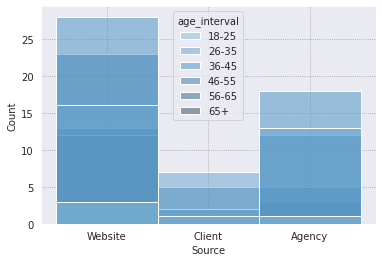

In [453]:
# Как связан возраст и источник получения информации о компании?
sns.histplot(data=df_copy, x="Source", hue="age_interval",palette="Blues_d");

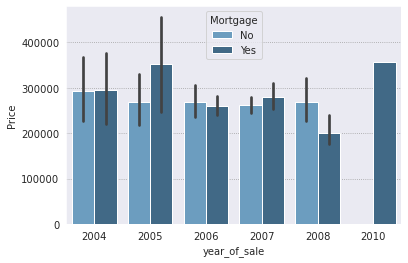

In [398]:
#Как ипотека влияла на продажи и цену за все время наблюдения
sns.barplot(x="year_of_sale", y="Price", hue="Mortgage", data=df_copy, palette="Blues_d");

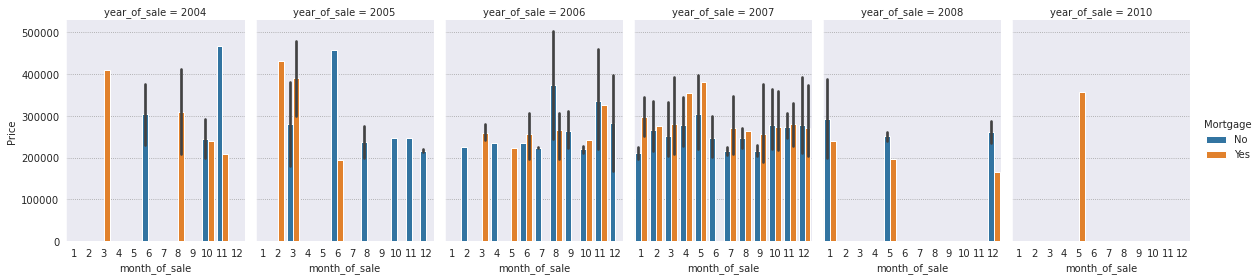

In [401]:
#Распределение прибыли по годам и месяцам
g = sns.catplot(x="month_of_sale", y="Price",

                hue="Mortgage", col="year_of_sale",

                data=df_copy, kind="bar",

                height=4, aspect=.7);